In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('polymer_blend_dataset.csv')

# Display the first few rows and the data types
display(df.head())
display(df.info())

sample_id polymer_A polymer_B  blend_ratio_A  blend_ratio_B  \
0  BLEND000001       PA6       PVC       0.711875       0.288125   
1  BLEND000002       PA6       PET       0.389975       0.610025   
2  BLEND000003        PS        PE       0.334181       0.665819   
3  BLEND000004       PA6       EVA       0.769629       0.230371   
4  BLEND000005       PVC        PP       0.207287       0.792713   

   molecular_weight_A  molecular_weight_B additive_type  additive_wt_pct  \
0        25424.557672        32636.089984   Plasticizer         1.581648   
1        15373.870837        18522.507959        Filler         2.102965   
2        52005.561898        17762.706831        Filler         3.944264   
3        16239.865214        18163.701526   Plasticizer         4.456064   
4        24521.744036        20934.785262   Antioxidant         3.484760   

    processing_method  ...  UV_stability_index  scratch_resistance_N  \
0         FilmCasting  ...            0.437711              2.927385   
1         BlowMolding  ...            0.358323              3.610961   
2  CompressionMolding  ...            0.710470              1.962486   
3         FilmCasting  ...            0.261283              3.892527   
4  CompressionMolding  ...            0.574361              2.438687   

   thermal_conductivity_W_mK  dielectric_constant  optical_clarity_pct  \
0                   0.163834             2.506089            77.102343   
1                   0.133478             2.382039            80.534747   
2                   0.171350             2.159251            59.150404   
3                   0.234910             2.778393            85.413355   
4                   0.203478             2.572803            81.076325   

   barrier_score  processing_yield_pct  experiment_batch  operator_id  lab_id  
0      13.586938             82.435437                42           16      11  
1      22.080082             87.718517               232           14       8  
2      25.399882             91.486805                37           41      19  
3      19.751927             85.068239                83           20      16  
4      29.370517             85.968980               187           21      11  

[5 rows x 47 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   sample_id                          120000 non-null  object 
 1   polymer_A                          120000 non-null  object 
 2   polymer_B                          120000 non-null  object 
 3   blend_ratio_A                      120000 non-null  float64
 4   blend_ratio_B                      120000 non-null  float64
 5   molecular_weight_A                 120000 non-null  float64
 6   molecular_weight_B                 120000 non-null  float64
 7   additive_type                      100109 non-null  object 
 8   additive_wt_pct                    120000 non-null  float64
 9   processing_method                  120000 non-null  object 
 10  processing_temp_C                  120000 non-null  float64
 11  processing_pressure_MPa            1200

None

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
additive_type    19891
dtype: int64


In [3]:
# Fill missing values in 'additive_type' with 'Unknown'
df['additive_type'].fillna('Unknown', inplace=True)

# Verify that there are no more missing values
print("\nMissing values after filling:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing values after filling:
Series([], dtype: int64)


/tmp/ipython-input-1977912028.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['additive_type'].fillna('Unknown', inplace=True)


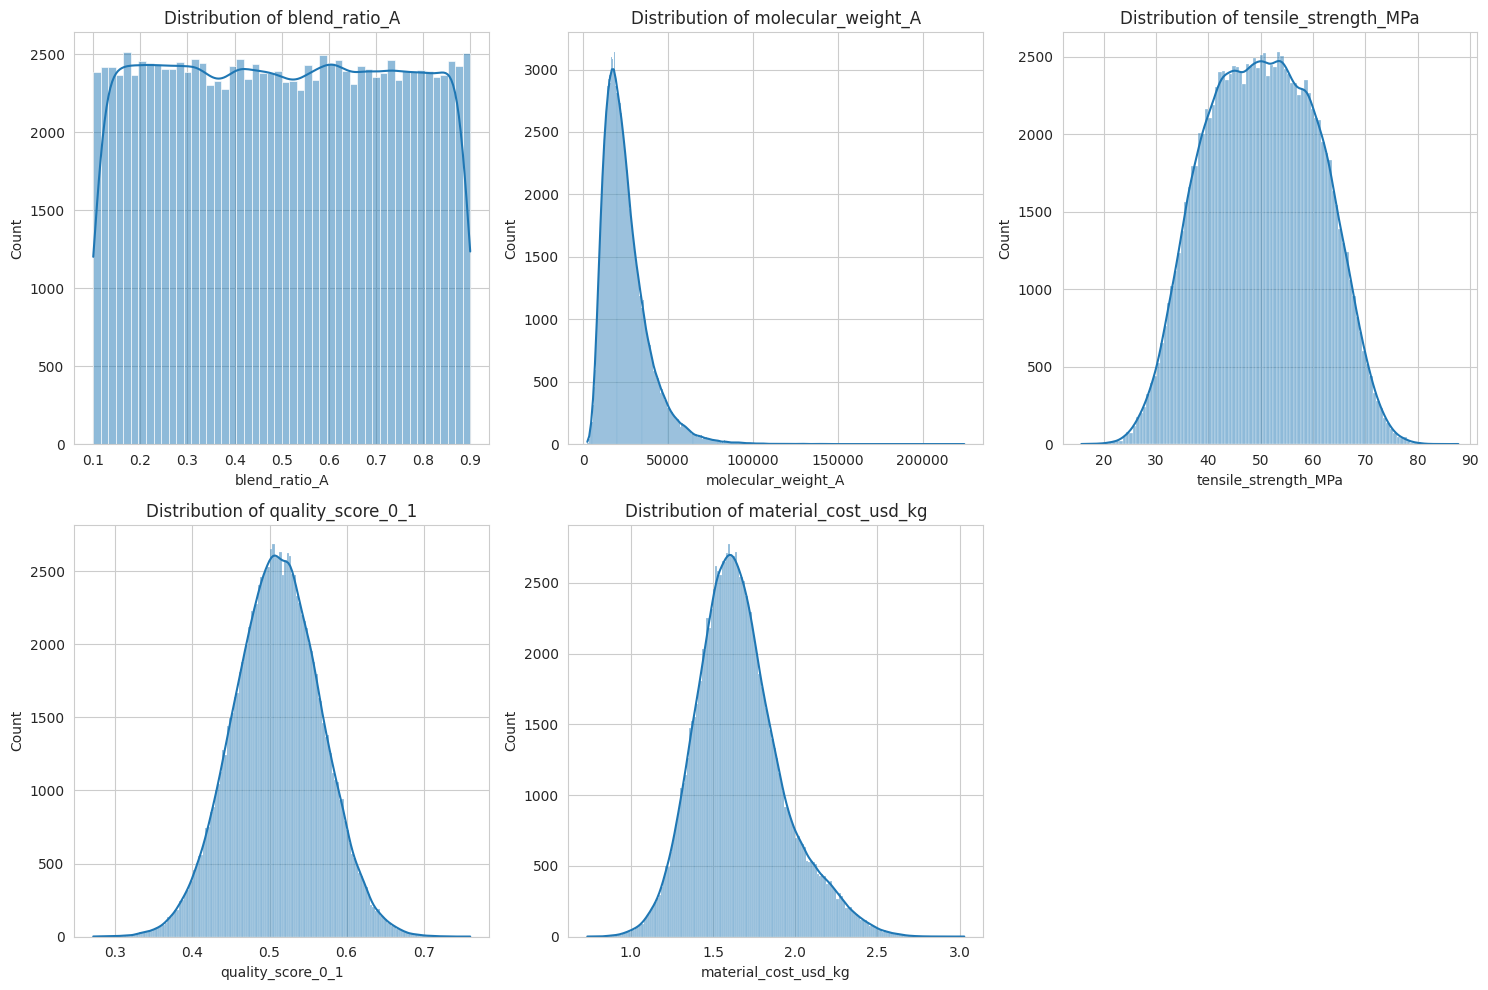

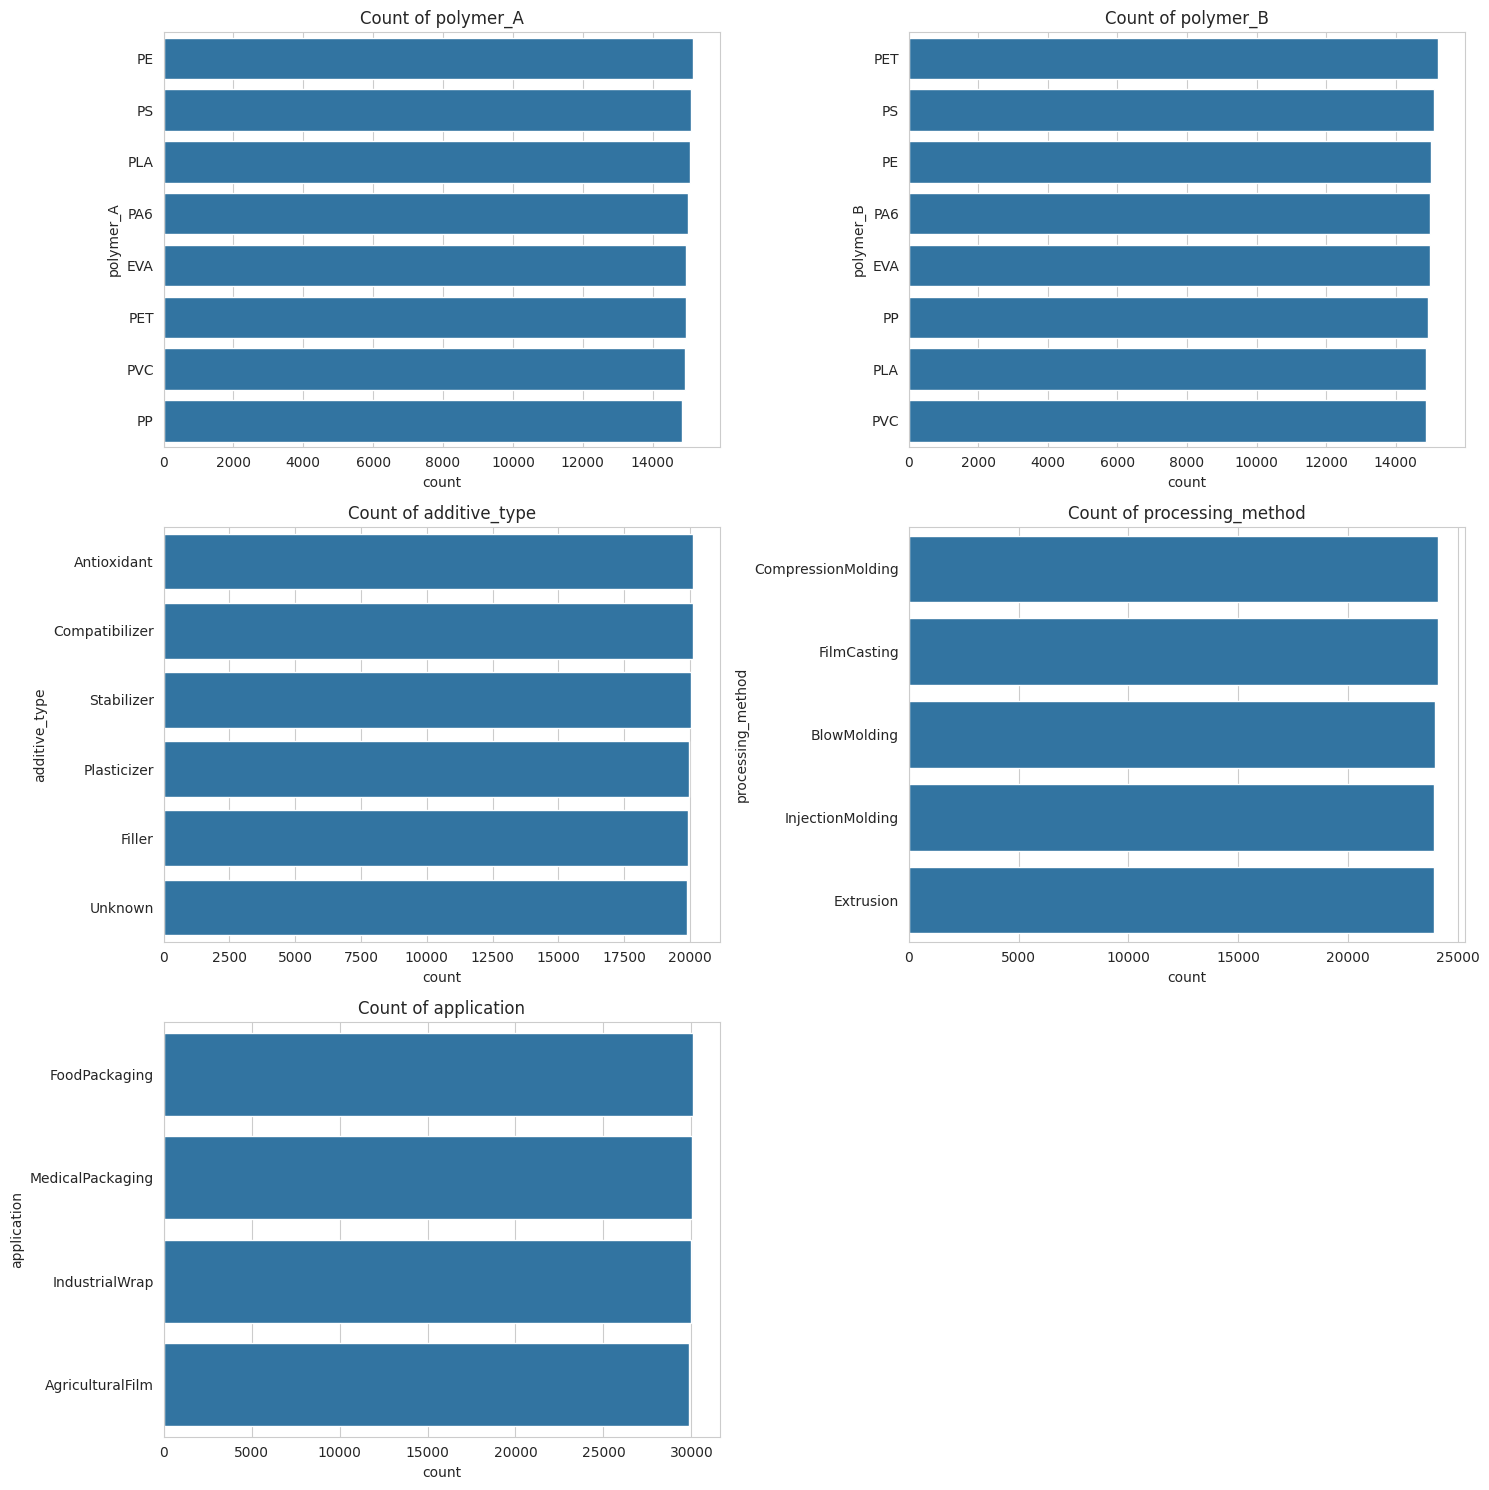

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Visualize the distribution of some numerical features
numerical_cols = ['blend_ratio_A', 'molecular_weight_A', 'tensile_strength_MPa', 'quality_score_0_1', 'material_cost_usd_kg']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize the counts of some categorical features
categorical_cols = ['polymer_A', 'polymer_B', 'additive_type', 'processing_method', 'application']
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

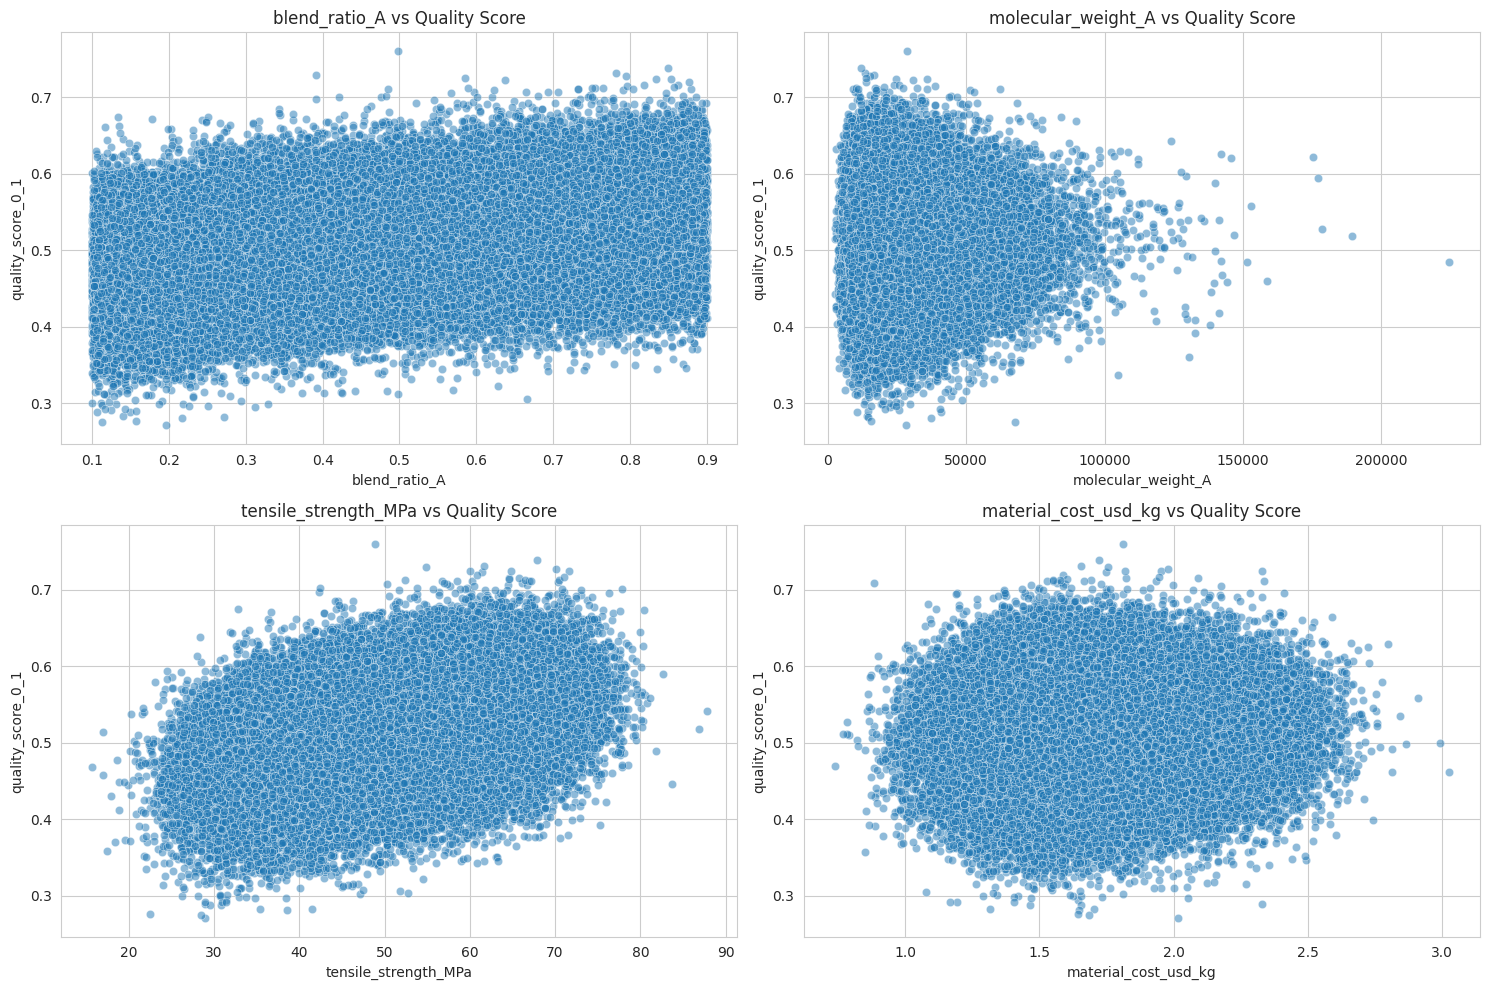

In [5]:
# Visualize relationships between numerical features and quality_score_0_1
numerical_cols_for_scatter = ['blend_ratio_A', 'molecular_weight_A', 'tensile_strength_MPa', 'material_cost_usd_kg']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_scatter):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=col, y='quality_score_0_1', alpha=0.5)
    plt.title(f'{col} vs Quality Score')
plt.tight_layout()
plt.show()

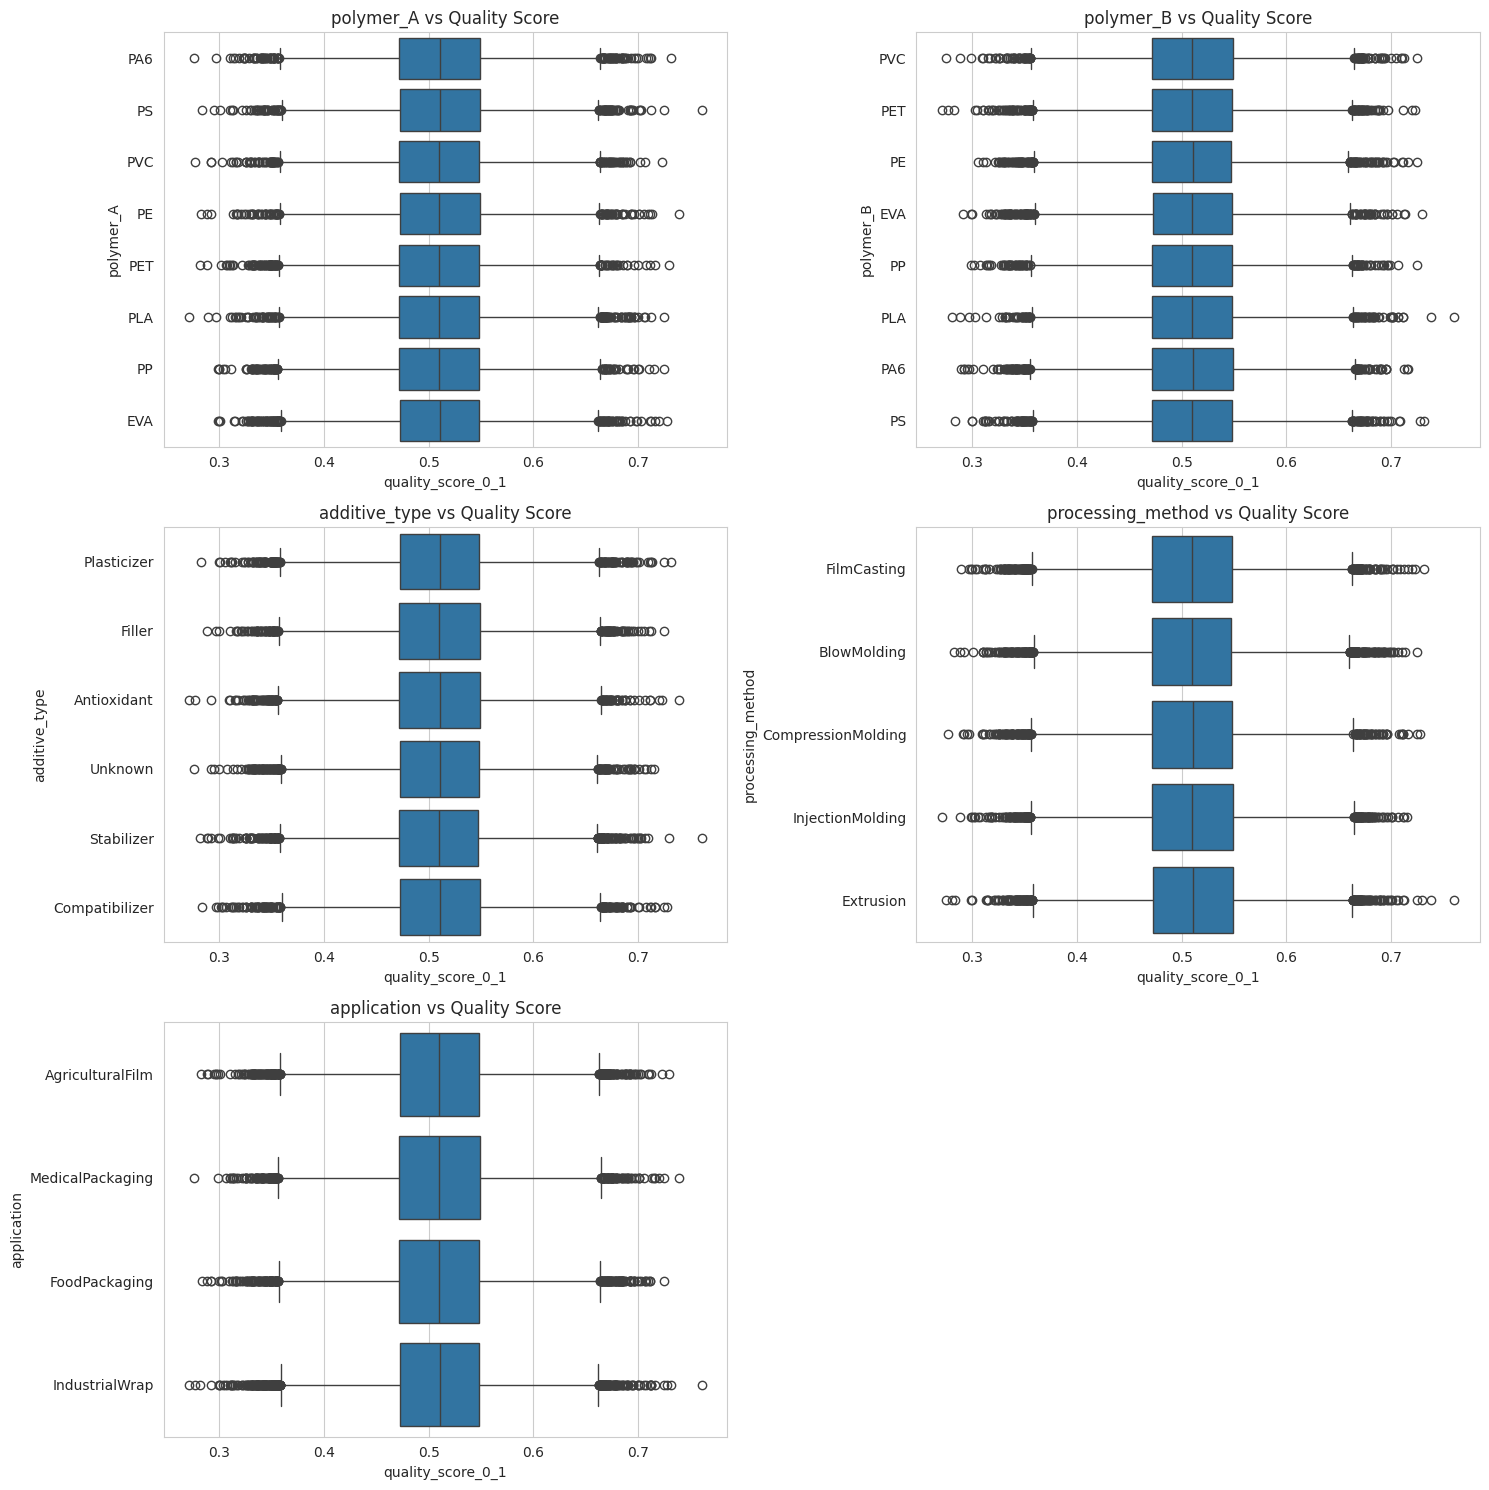

In [6]:
# Visualize relationships between categorical features and quality_score_0_1
categorical_cols_for_box = ['polymer_A', 'polymer_B', 'additive_type', 'processing_method', 'application']
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols_for_box):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df, x='quality_score_0_1', y=col)
    plt.title(f'{col} vs Quality Score')
plt.tight_layout()
plt.show()

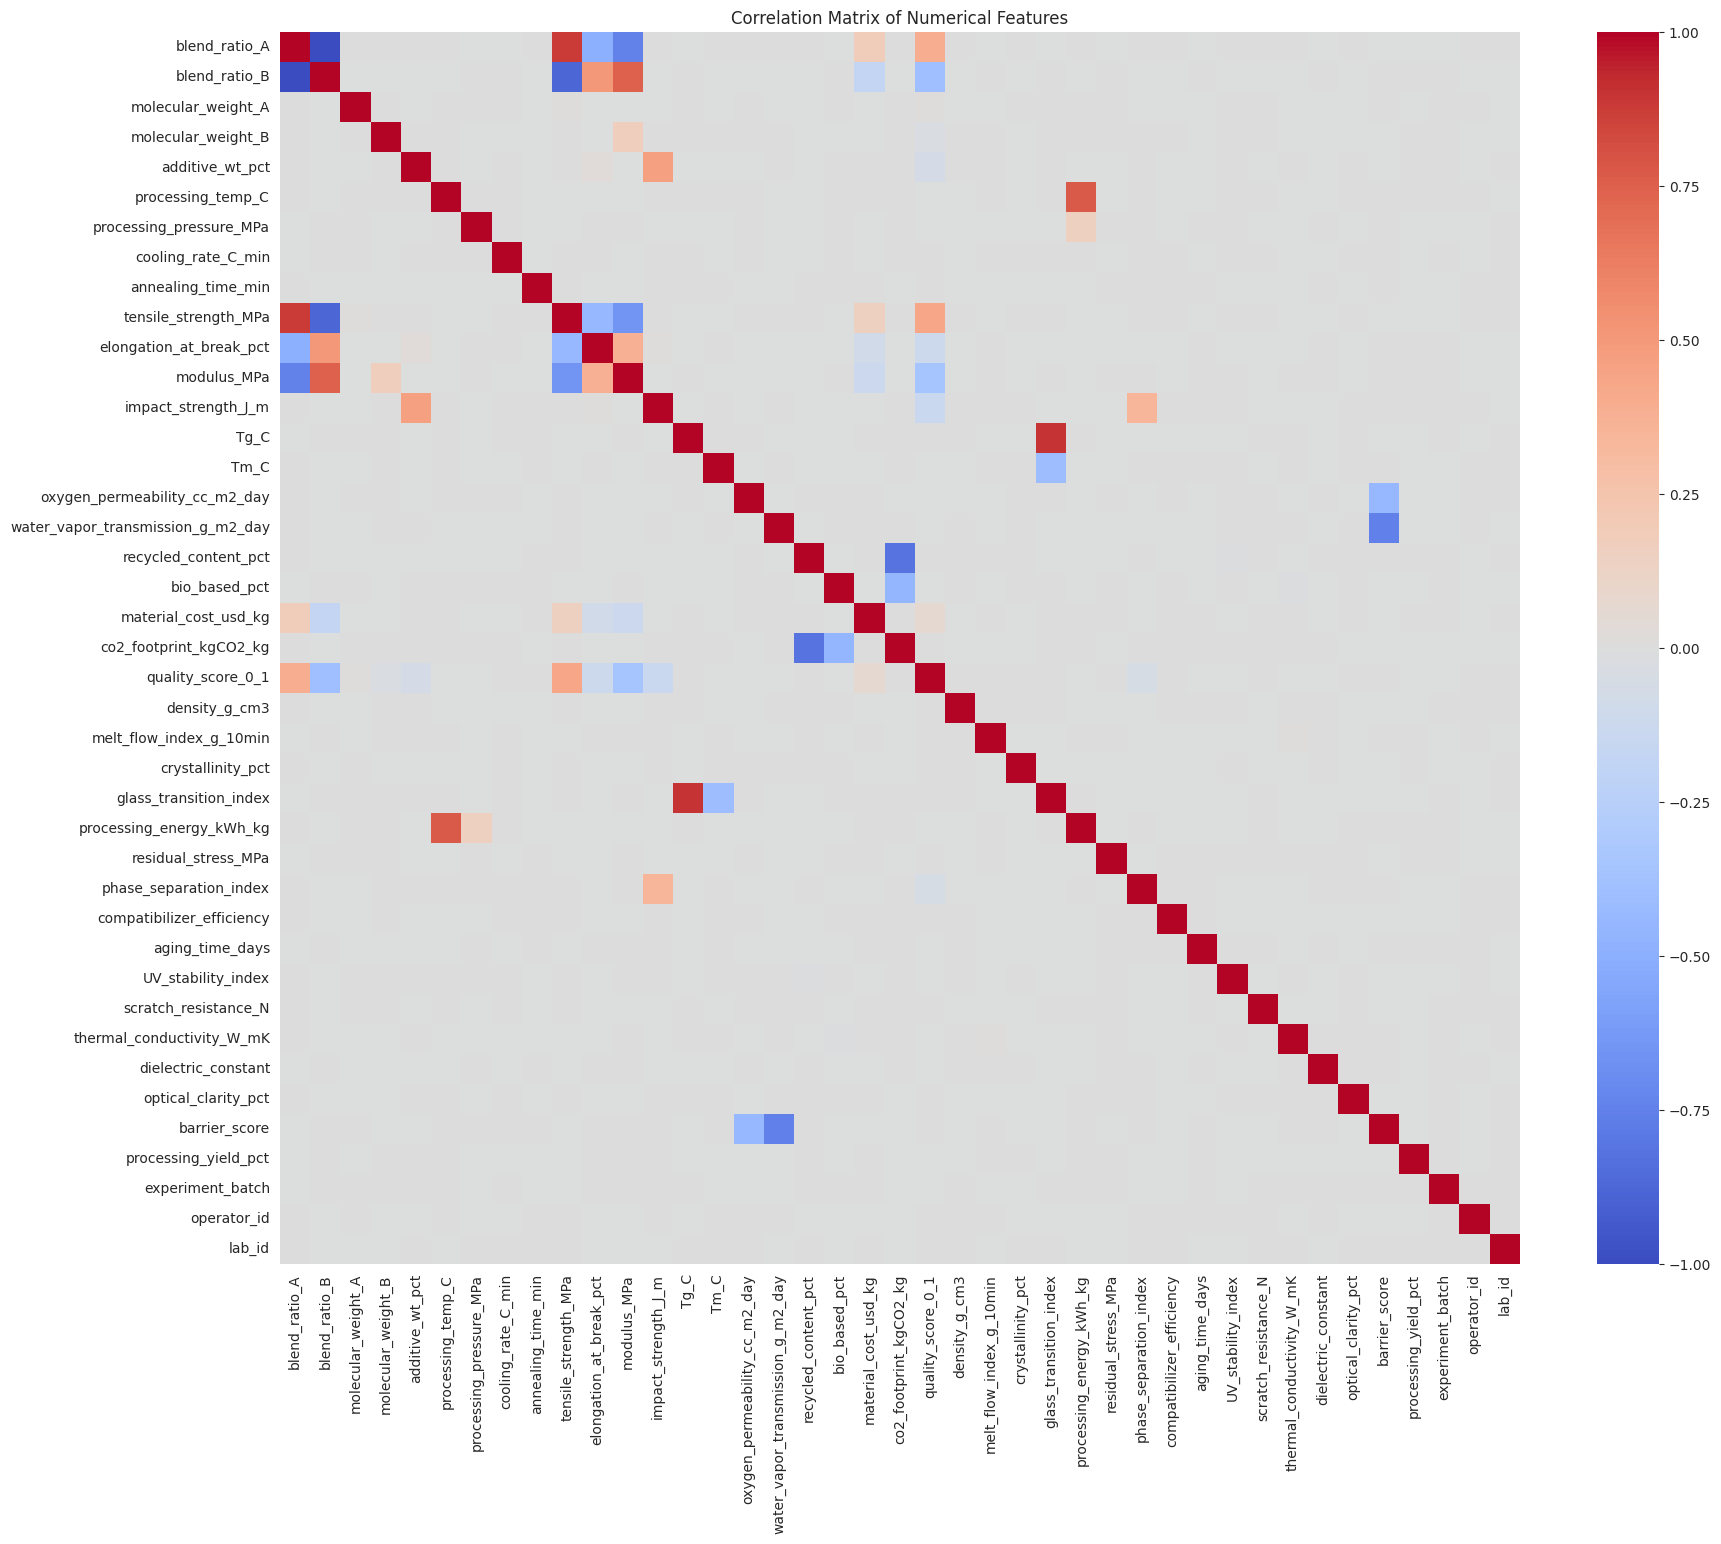

In [7]:
# Select only numerical columns for correlation heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

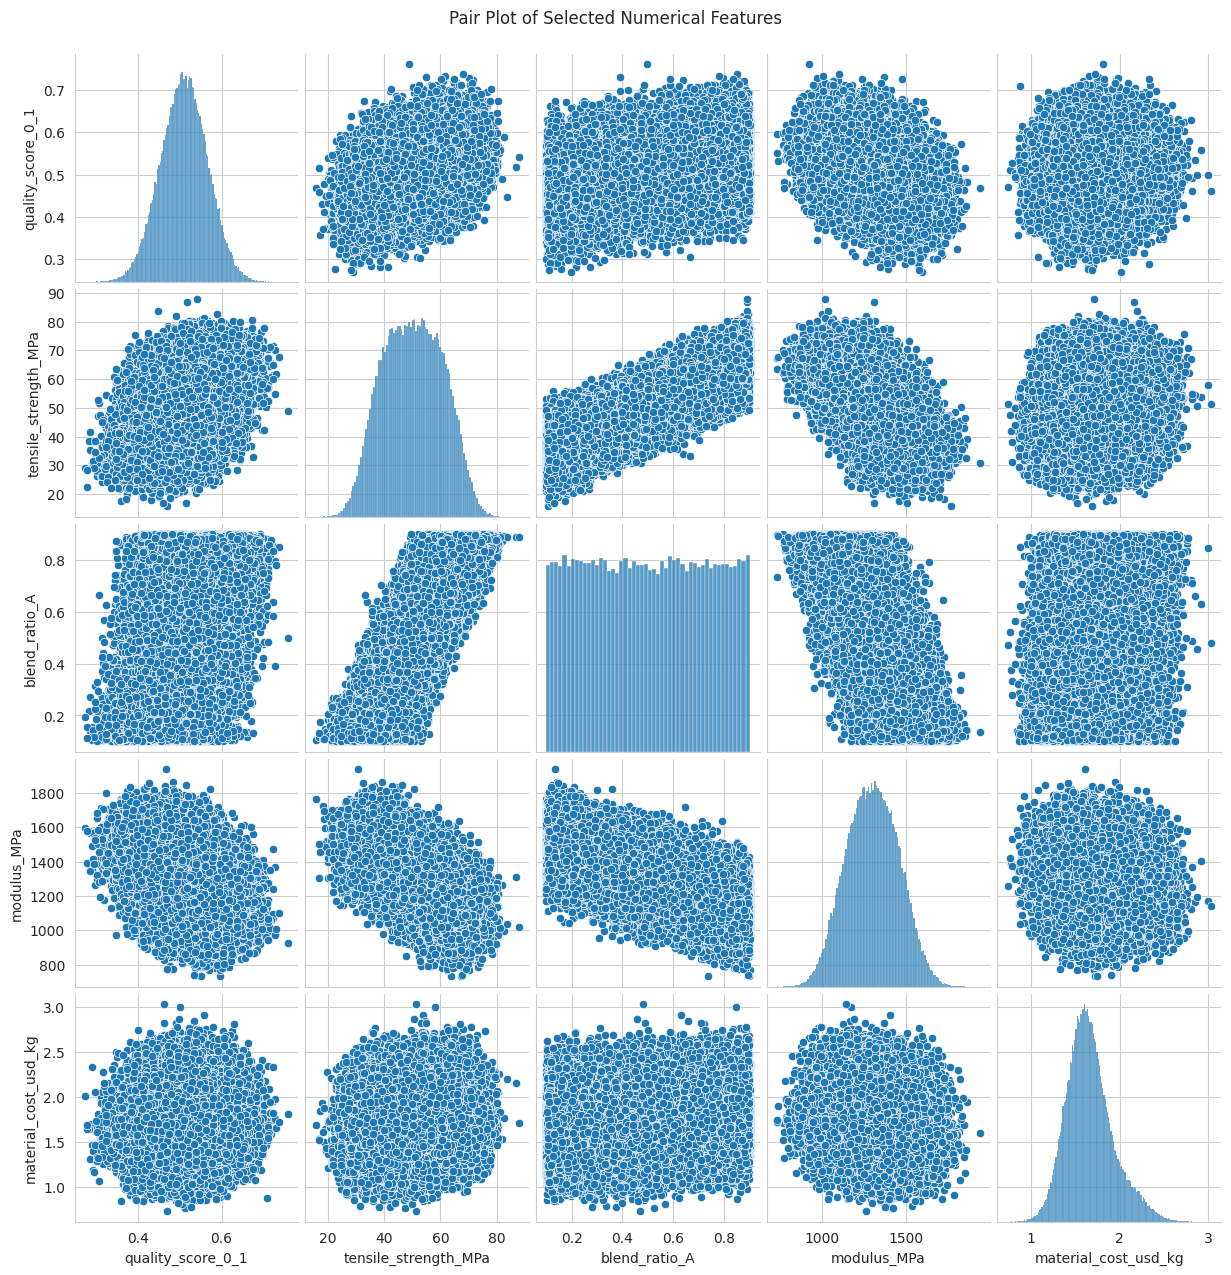

In [8]:
# Select some numerical columns for a pair plot, including the quality score
numerical_cols_for_pairplot = ['quality_score_0_1', 'tensile_strength_MPa', 'blend_ratio_A', 'modulus_MPa', 'material_cost_usd_kg']

# Create a pair plot
sns.pairplot(df[numerical_cols_for_pairplot])
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

# Task
Analyze the "polymer_blend_dataset.csv" dataset in full detail following the 11 steps of the data science procedure for machine learning. Include a detailed Exploratory Data Analysis (EDA) with at least 22 visualizations/graphs. Use XGBoost for surrogate modeling and NSGA-II for multi-objective optimization to optimize polymer blends. Explore possibilities for feature engineering, including creating interaction terms, polynomial features, ratio features, and categorical feature combinations. Evaluate the engineered features and select the most promising ones for modeling. Split the data, train and evaluate the models, develop surrogate models, perform multi-objective optimization, and analyze and interpret the results. Summarize the process and findings.

## Create interaction terms

### Subtask:
Generate new features by creating interaction terms between relevant numerical features.


**Reasoning**:
Create interaction terms based on the features that showed some correlation with the target variable in the previous EDA, specifically `tensile_strength_MPa`, `blend_ratio_A`, `modulus_MPa`, and `material_cost_usd_kg`.



In [9]:
# Create interaction terms
df['tensile_strength_MPa_x_blend_ratio_A'] = df['tensile_strength_MPa'] * df['blend_ratio_A']
df['tensile_strength_MPa_x_modulus_MPa'] = df['tensile_strength_MPa'] * df['modulus_MPa']
df['blend_ratio_A_x_modulus_MPa'] = df['blend_ratio_A'] * df['modulus_MPa']
df['material_cost_usd_kg_x_blend_ratio_A'] = df['material_cost_usd_kg'] * df['blend_ratio_A']
df['material_cost_usd_kg_x_tensile_strength_MPa'] = df['material_cost_usd_kg'] * df['tensile_strength_MPa']

# Display the first few rows with the new features
display(df[['tensile_strength_MPa', 'blend_ratio_A', 'modulus_MPa', 'material_cost_usd_kg',
            'tensile_strength_MPa_x_blend_ratio_A', 'tensile_strength_MPa_x_modulus_MPa',
            'blend_ratio_A_x_modulus_MPa', 'material_cost_usd_kg_x_blend_ratio_A',
            'material_cost_usd_kg_x_tensile_strength_MPa']].head())

tensile_strength_MPa  blend_ratio_A  modulus_MPa  material_cost_usd_kg  \
0             53.774612       0.711875  1249.098438              1.669552   
1             39.517693       0.389975  1303.674814              1.435037   
2             43.811953       0.334181  1225.232646              1.554684   
3             69.993766       0.769629  1003.763202              1.857154   
4             42.275027       0.207287  1439.604935              1.829203   

   tensile_strength_MPa_x_blend_ratio_A  tensile_strength_MPa_x_modulus_MPa  \
0                             38.280816                        67169.784007   
1                             15.410931                        51518.220538   
2                             14.641140                        53679.834791   
3                             53.869219                        70257.166903   
4                              8.763056                        60859.337055   

   blend_ratio_A_x_modulus_MPa  material_cost_usd_kg_x_blend_ratio_A  \
0                   889.202274                              1.188513   
1                   508.401218                              0.559629   
2                   409.449980                              0.519547   
3                   772.525084                              1.429319   
4                   298.411123                              0.379170   

   material_cost_usd_kg_x_tensile_strength_MPa  
0                                    89.779497  
1                                    56.709347  
2                                    68.113758  
3                                   129.989208  
4                                    77.329622

## Create polynomial features

### Subtask:
Generate new features by creating polynomial features for numerical columns that show non-linear relationships.


**Reasoning**:
Based on the scatter plots from the EDA, 'tensile_strength_MPa' and 'modulus_MPa' show potential non-linear relationships with 'quality_score_0_1'. Generating polynomial features for these columns with a degree of 2 will capture these non-linearities.



In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Identify columns for polynomial features based on scatter plots
# 'tensile_strength_MPa' and 'modulus_MPa' show potential non-linear relationships with 'quality_score_0_1'
cols_for_poly = ['tensile_strength_MPa', 'modulus_MPa']

# Select a degree for the polynomial features
degree = 2

# Use PolynomialFeatures to generate polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
poly_features = poly.fit_transform(df[cols_for_poly])

# Create a DataFrame from the polynomial features with meaningful column names
poly_col_names = poly.get_feature_names_out(cols_for_poly)
poly_df = pd.DataFrame(poly_features, columns=poly_col_names, index=df.index)

# Add the generated polynomial features to the original DataFrame
df = pd.concat([df, poly_df], axis=1)

# Display the first few rows of the DataFrame with the new polynomial features
display(df[['tensile_strength_MPa', 'modulus_MPa'] + list(poly_col_names)].head())

tensile_strength_MPa  tensile_strength_MPa  modulus_MPa  modulus_MPa  \
0             53.774612             53.774612  1249.098438  1249.098438   
1             39.517693             39.517693  1303.674814  1303.674814   
2             43.811953             43.811953  1225.232646  1225.232646   
3             69.993766             69.993766  1003.763202  1003.763202   
4             42.275027             42.275027  1439.604935  1439.604935   

   tensile_strength_MPa  tensile_strength_MPa  modulus_MPa  modulus_MPa  \
0             53.774612             53.774612  1249.098438  1249.098438   
1             39.517693             39.517693  1303.674814  1303.674814   
2             43.811953             43.811953  1225.232646  1225.232646   
3             69.993766             69.993766  1003.763202  1003.763202   
4             42.275027             42.275027  1439.604935  1439.604935   

   tensile_strength_MPa^2  tensile_strength_MPa modulus_MPa  modulus_MPa^2  
0             2891.708911                      67169.784007   1.560247e+06  
1             1561.648028                      51518.220538   1.699568e+06  
2             1919.487202                      53679.834791   1.501195e+06  
3             4899.127312                      70257.166903   1.007541e+06  
4             1787.177882                      60859.337055   2.072462e+06

## Create ratio features

### Subtask:
Generate new features by creating ratios of relevant numerical features.


**Reasoning**:
Create ratio features for relevant numerical columns and add them to the DataFrame.



In [11]:
# Create ratio features for relevant numerical columns
# Consider ratios that might have physical meaning in material science

# Ratio of blend ratios (could indicate relative dominance of one polymer)
# Add a small epsilon to avoid division by zero
epsilon = 1e-9
df['blend_ratio_A_to_B'] = df['blend_ratio_A'] / (df['blend_ratio_B'] + epsilon)

# Ratio of molecular weights (could influence mixing or entanglement)
df['molecular_weight_A_to_B'] = df['molecular_weight_A'] / (df['molecular_weight_B'] + epsilon)

# Ratio of mechanical properties (e.g., tensile strength to modulus)
df['tensile_strength_to_modulus'] = df['tensile_strength_MPa'] / (df['modulus_MPa'] + epsilon)

# Ratio of material cost to tensile strength (cost-effectiveness in terms of strength)
df['material_cost_to_tensile_strength'] = df['material_cost_usd_kg'] / (df['tensile_strength_MPa'] + epsilon)

# Ratio of processing energy to processing yield (energy efficiency)
df['processing_energy_to_yield'] = df['processing_energy_kWh_kg'] / (df['processing_yield_pct'] + epsilon)

# Display the first few rows with the new ratio features
display(df[['blend_ratio_A', 'blend_ratio_B', 'blend_ratio_A_to_B',
            'molecular_weight_A', 'molecular_weight_B', 'molecular_weight_A_to_B',
            'tensile_strength_MPa', 'modulus_MPa', 'tensile_strength_to_modulus',
            'material_cost_usd_kg', 'material_cost_to_tensile_strength',
            'processing_energy_kWh_kg', 'processing_yield_pct', 'processing_energy_to_yield']].head())

ValueError: Cannot set a DataFrame with multiple columns to the single column tensile_strength_to_modulus

**Reasoning**:
The previous code failed because of a potential issue with how the division was being handled or assigned. Regenerate the code block to correctly calculate and assign the ratio features.



In [12]:
# Create ratio features for relevant numerical columns
# Consider ratios that might have physical meaning in material science

# Add a small epsilon to avoid division by zero
epsilon = 1e-9

# Ratio of blend ratios (could indicate relative dominance of one polymer)
df['blend_ratio_A_to_B'] = df['blend_ratio_A'] / (df['blend_ratio_B'] + epsilon)

# Ratio of molecular weights (could influence mixing or entanglement)
df['molecular_weight_A_to_B'] = df['molecular_weight_A'] / (df['molecular_weight_B'] + epsilon)

# Ratio of mechanical properties (e.g., tensile strength to modulus)
df['tensile_strength_to_modulus'] = df['tensile_strength_MPa'] / (df['modulus_MPa'] + epsilon)

# Ratio of material cost to tensile strength (cost-effectiveness in terms of strength)
df['material_cost_to_tensile_strength'] = df['material_cost_usd_kg'] / (df['tensile_strength_MPa'] + epsilon)

# Ratio of processing energy to processing yield (energy efficiency)
df['processing_energy_to_yield'] = df['processing_energy_kWh_kg'] / (df['processing_yield_pct'] + epsilon)

# Display the first few rows with the new ratio features
display(df[['blend_ratio_A', 'blend_ratio_B', 'blend_ratio_A_to_B',
            'molecular_weight_A', 'molecular_weight_B', 'molecular_weight_A_to_B',
            'tensile_strength_MPa', 'modulus_MPa', 'tensile_strength_to_modulus',
            'material_cost_usd_kg', 'material_cost_to_tensile_strength',
            'processing_energy_kWh_kg', 'processing_yield_pct', 'processing_energy_to_yield']].head())

ValueError: Cannot set a DataFrame with multiple columns to the single column tensile_strength_to_modulus

**Reasoning**:
The error indicates that the division operation is resulting in a DataFrame with multiple columns instead of a single Series, which is unexpected for element-wise division of two Series. This might be an environment-specific issue or an unusual interaction. To resolve this, I will explicitly ensure the result of the division is treated as a single Series before assignment by using `.iloc[:, 0]` if it's a DataFrame, or by converting it to a Series directly. If the issue persists, I will simplify the code to isolate the problematic division.



In [13]:
# Create ratio features for relevant numerical columns
# Consider ratios that might have physical meaning in material science

# Add a small epsilon to avoid division by zero
epsilon = 1e-9

# Ratio of blend ratios (could indicate relative dominance of one polymer)
df['blend_ratio_A_to_B'] = df['blend_ratio_A'] / (df['blend_ratio_B'] + epsilon)

# Ratio of molecular weights (could influence mixing or entanglement)
df['molecular_weight_A_to_B'] = df['molecular_weight_A'] / (df['molecular_weight_B'] + epsilon)

# Ratio of mechanical properties (e.g., tensile strength to modulus)
# Ensure the result is a single series before assignment
tensile_to_modulus_ratio = df['tensile_strength_MPa'] / (df['modulus_MPa'] + epsilon)
if isinstance(tensile_to_modulus_ratio, pd.DataFrame):
    df['tensile_strength_to_modulus'] = tensile_to_modulus_ratio.iloc[:, 0]
else:
    df['tensile_strength_to_modulus'] = tensile_to_modulus_ratio

# Ratio of material cost to tensile strength (cost-effectiveness in terms of strength)
material_cost_to_tensile_strength_ratio = df['material_cost_usd_kg'] / (df['tensile_strength_MPa'] + epsilon)
if isinstance(material_cost_to_tensile_strength_ratio, pd.DataFrame):
    df['material_cost_to_tensile_strength'] = material_cost_to_tensile_strength_ratio.iloc[:, 0]
else:
    df['material_cost_to_tensile_strength'] = material_cost_to_tensile_strength_ratio

# Ratio of processing energy to processing yield (energy efficiency)
processing_energy_to_yield_ratio = df['processing_energy_kWh_kg'] / (df['processing_yield_pct'] + epsilon)
if isinstance(processing_energy_to_yield_ratio, pd.DataFrame):
    df['processing_energy_to_yield'] = processing_energy_to_yield_ratio.iloc[:, 0]
else:
    df['processing_energy_to_yield'] = processing_energy_to_yield_ratio


# Display the first few rows with the new ratio features
display(df[['blend_ratio_A', 'blend_ratio_B', 'blend_ratio_A_to_B',
            'molecular_weight_A', 'molecular_weight_B', 'molecular_weight_A_to_B',
            'tensile_strength_MPa', 'modulus_MPa', 'tensile_strength_to_modulus',
            'material_cost_usd_kg', 'material_cost_to_tensile_strength',
            'processing_energy_kWh_kg', 'processing_yield_pct', 'processing_energy_to_yield']].head())

ValueError: cannot reindex on an axis with duplicate labels

**Reasoning**:
The error "cannot reindex on an axis with duplicate labels" indicates that there are duplicate column names in the DataFrame, which is interfering with the alignment during the division operation. This likely happened during the previous feature engineering steps. I need to identify and handle these duplicate column names before attempting to create the ratio features again. I will check for duplicate column names and, if found, address them by renaming or dropping before proceeding with creating the ratio features.



In [14]:
# Check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

# If there are duplicate columns, address them.
# Based on previous steps, the duplicates are likely from adding polynomial features.
# The polynomial features were added using concat, which might have duplicated columns if the index was not aligned correctly or if the original columns were included in the polynomial output.
# Let's drop the duplicated columns and keep the first occurrence.
if not duplicate_columns.empty:
    df = df.loc[:,~df.columns.duplicated()]
    print("Duplicate columns removed.")
    print("Remaining columns:", df.columns)

# Now, attempt to create ratio features again

# Add a small epsilon to avoid division by zero
epsilon = 1e-9

# Ratio of blend ratios (could indicate relative dominance of one polymer)
df['blend_ratio_A_to_B'] = df['blend_ratio_A'] / (df['blend_ratio_B'] + epsilon)

# Ratio of molecular weights (could influence mixing or entanglement)
df['molecular_weight_A_to_B'] = df['molecular_weight_A'] / (df['molecular_weight_B'] + epsilon)

# Ratio of mechanical properties (e.g., tensile strength to modulus)
df['tensile_strength_to_modulus'] = df['tensile_strength_MPa'] / (df['modulus_MPa'] + epsilon)

# Ratio of material cost to tensile strength (cost-effectiveness in terms of strength)
df['material_cost_to_tensile_strength'] = df['material_cost_usd_kg'] / (df['tensile_strength_MPa'] + epsilon)

# Ratio of processing energy to processing yield (energy efficiency)
df['processing_energy_to_yield'] = df['processing_energy_kWh_kg'] / (df['processing_yield_pct'] + epsilon)

# Display the first few rows with the new ratio features
display(df[['blend_ratio_A', 'blend_ratio_B', 'blend_ratio_A_to_B',
            'molecular_weight_A', 'molecular_weight_B', 'molecular_weight_A_to_B',
            'tensile_strength_MPa', 'modulus_MPa', 'tensile_strength_to_modulus',
            'material_cost_usd_kg', 'material_cost_to_tensile_strength',
            'processing_energy_kWh_kg', 'processing_yield_pct', 'processing_energy_to_yield']].head())

Duplicate columns: Index(['tensile_strength_MPa', 'modulus_MPa'], dtype='object')
Duplicate columns removed.
Remaining columns: Index(['sample_id', 'polymer_A', 'polymer_B', 'blend_ratio_A', 'blend_ratio_B',
       'molecular_weight_A', 'molecular_weight_B', 'additive_type',
       'additive_wt_pct', 'processing_method', 'processing_temp_C',
       'processing_pressure_MPa', 'cooling_rate_C_min', 'annealing_time_min',
       'tensile_strength_MPa', 'elongation_at_break_pct', 'modulus_MPa',
       'impact_strength_J_m', 'Tg_C', 'Tm_C', 'oxygen_permeability_cc_m2_day',
       'water_vapor_transmission_g_m2_day', 'recycled_content_pct',
       'bio_based_pct', 'material_cost_usd_kg', 'co2_footprint_kgCO2_kg',
       'application', 'quality_score_0_1', 'density_g_cm3',
       'melt_flow_index_g_10min', 'crystallinity_pct',
       'glass_transition_index', 'processing_energy_kWh_kg',
       'residual_stress_MPa', 'phase_separation_index',
       'compatibilizer_efficiency', 'aging_time_days

/tmp/ipython-input-1412468619.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blend_ratio_A_to_B'] = df['blend_ratio_A'] / (df['blend_ratio_B'] + epsilon)
/tmp/ipython-input-1412468619.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['molecular_weight_A_to_B'] = df['molecular_weight_A'] / (df['molecular_weight_B'] + epsilon)
/tmp/ipython-input-1412468619.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

blend_ratio_A  blend_ratio_B  blend_ratio_A_to_B  molecular_weight_A  \
0       0.711875       0.288125            2.470719        25424.557672   
1       0.389975       0.610025            0.639278        15373.870837   
2       0.334181       0.665819            0.501911        52005.561898   
3       0.769629       0.230371            3.340821        16239.865214   
4       0.207287       0.792713            0.261490        24521.744036   

   molecular_weight_B  molecular_weight_A_to_B  tensile_strength_MPa  \
0        32636.089984                 0.779032             53.774612   
1        18522.507959                 0.830010             39.517693   
2        17762.706831                 2.927795             43.811953   
3        18163.701526                 0.894083             69.993766   
4        20934.785262                 1.171340             42.275027   

   modulus_MPa  tensile_strength_to_modulus  material_cost_usd_kg  \
0  1249.098438                     0.043051              1.669552   
1  1303.674814                     0.030313              1.435037   
2  1225.232646                     0.035758              1.554684   
3  1003.763202                     0.069731              1.857154   
4  1439.604935                     0.029366              1.829203   

   material_cost_to_tensile_strength  processing_energy_kWh_kg  \
0                           0.031047                 27.816487   
1                           0.036314                 27.701180   
2                           0.035485                 26.596663   
3                           0.026533                 27.456052   
4                           0.043269                 31.722953   

   processing_yield_pct  processing_energy_to_yield  
0             82.435437                    0.337434  
1             87.718517                    0.315796  
2             91.486805                    0.290716  
3             85.068239                    0.322753  
4             85.968980                    0.369005

## Create categorical feature combinations

### Subtask:
Generate new features by combining relevant categorical features.


**Reasoning**:
Generate new features by combining relevant categorical features by concatenating their string representations.



In [15]:
# Identify relevant categorical columns
categorical_cols = ['polymer_A', 'polymer_B', 'additive_type', 'processing_method', 'application']

# Create new categorical features by combining relevant pairs
# Combine polymer A and polymer B
df['polymer_A_B_combination'] = df['polymer_A'].astype(str) + '_' + df['polymer_B'].astype(str)

# Combine polymer A and additive type
df['polymer_A_additive_combination'] = df['polymer_A'].astype(str) + '_' + df['additive_type'].astype(str)

# Combine polymer B and additive type
df['polymer_B_additive_combination'] = df['polymer_B'].astype(str) + '_' + df['additive_type'].astype(str)

# Combine processing method and application
df['processing_method_application_combination'] = df['processing_method'].astype(str) + '_' + df['application'].astype(str)

# Display the first few rows of the DataFrame with the new features
display(df[['polymer_A', 'polymer_B', 'additive_type', 'processing_method', 'application',
            'polymer_A_B_combination', 'polymer_A_additive_combination',
            'polymer_B_additive_combination', 'processing_method_application_combination']].head())

polymer_A polymer_B additive_type   processing_method       application  \
0       PA6       PVC   Plasticizer         FilmCasting  AgriculturalFilm   
1       PA6       PET        Filler         BlowMolding  MedicalPackaging   
2        PS        PE        Filler  CompressionMolding  MedicalPackaging   
3       PA6       EVA   Plasticizer         FilmCasting     FoodPackaging   
4       PVC        PP   Antioxidant  CompressionMolding  AgriculturalFilm   

  polymer_A_B_combination polymer_A_additive_combination  \
0                 PA6_PVC                PA6_Plasticizer   
1                 PA6_PET                     PA6_Filler   
2                   PS_PE                      PS_Filler   
3                 PA6_EVA                PA6_Plasticizer   
4                  PVC_PP                PVC_Antioxidant   

  polymer_B_additive_combination processing_method_application_combination  
0                PVC_Plasticizer              FilmCasting_AgriculturalFilm  
1                     PET_Filler              BlowMolding_MedicalPackaging  
2                      PE_Filler       CompressionMolding_MedicalPackaging  
3                EVA_Plasticizer                 FilmCasting_FoodPackaging  
4                 PP_Antioxidant       CompressionMolding_AgriculturalFilm

## Evaluate engineered features

### Subtask:
Assess the potential impact of the newly engineered features on the target variable (quality score) through visualizations or correlation analysis.


**Reasoning**:
Select the newly engineered numerical features and the target variable, calculate the correlation matrix, and visualize it using a heatmap.



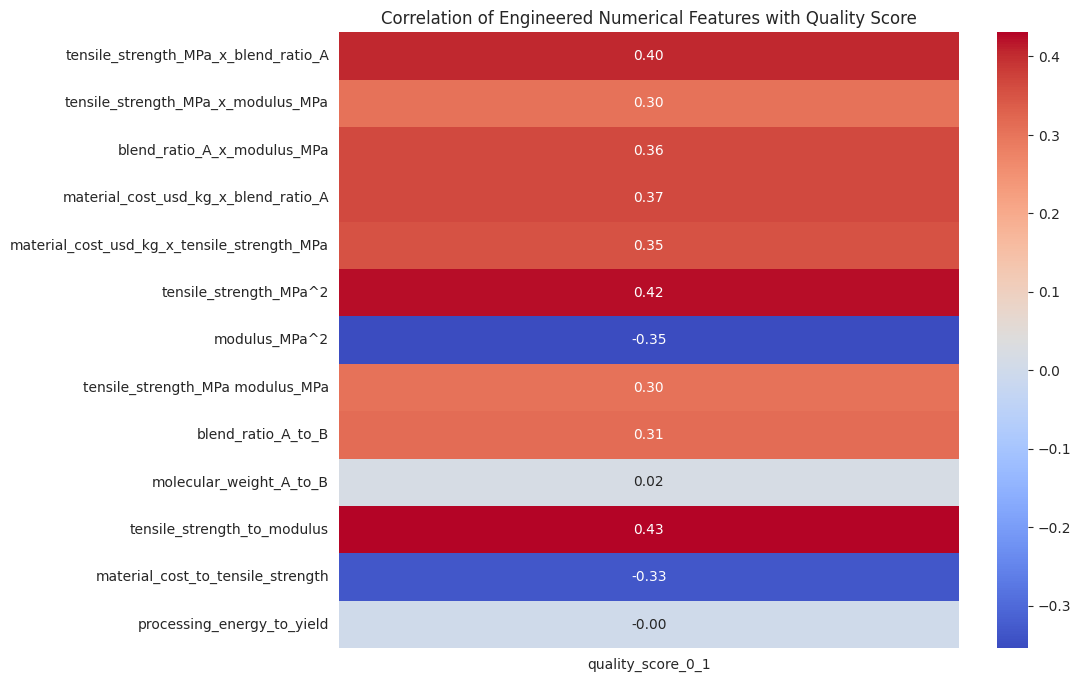

In [16]:
# Select the newly engineered numerical features and the target variable
engineered_numerical_cols = [
    'tensile_strength_MPa_x_blend_ratio_A',
    'tensile_strength_MPa_x_modulus_MPa',
    'blend_ratio_A_x_modulus_MPa',
    'material_cost_usd_kg_x_blend_ratio_A',
    'material_cost_usd_kg_x_tensile_strength_MPa',
    'tensile_strength_MPa^2',
    'modulus_MPa^2',
    'tensile_strength_MPa modulus_MPa',
    'blend_ratio_A_to_B',
    'molecular_weight_A_to_B',
    'tensile_strength_to_modulus',
    'material_cost_to_tensile_strength',
    'processing_energy_to_yield',
    'quality_score_0_1' # Include the target variable
]

# Ensure only existing columns are selected
engineered_numerical_cols = [col for col in engineered_numerical_cols if col in df.columns]

# Calculate the correlation matrix
engineered_numerical_correlation = df[engineered_numerical_cols].corr()

# Visualize the correlations with the target variable using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(engineered_numerical_correlation[['quality_score_0_1']].drop('quality_score_0_1'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Engineered Numerical Features with Quality Score')
plt.show()

**Reasoning**:
Visualize the relationship between the engineered categorical features and the target variable using box plots.



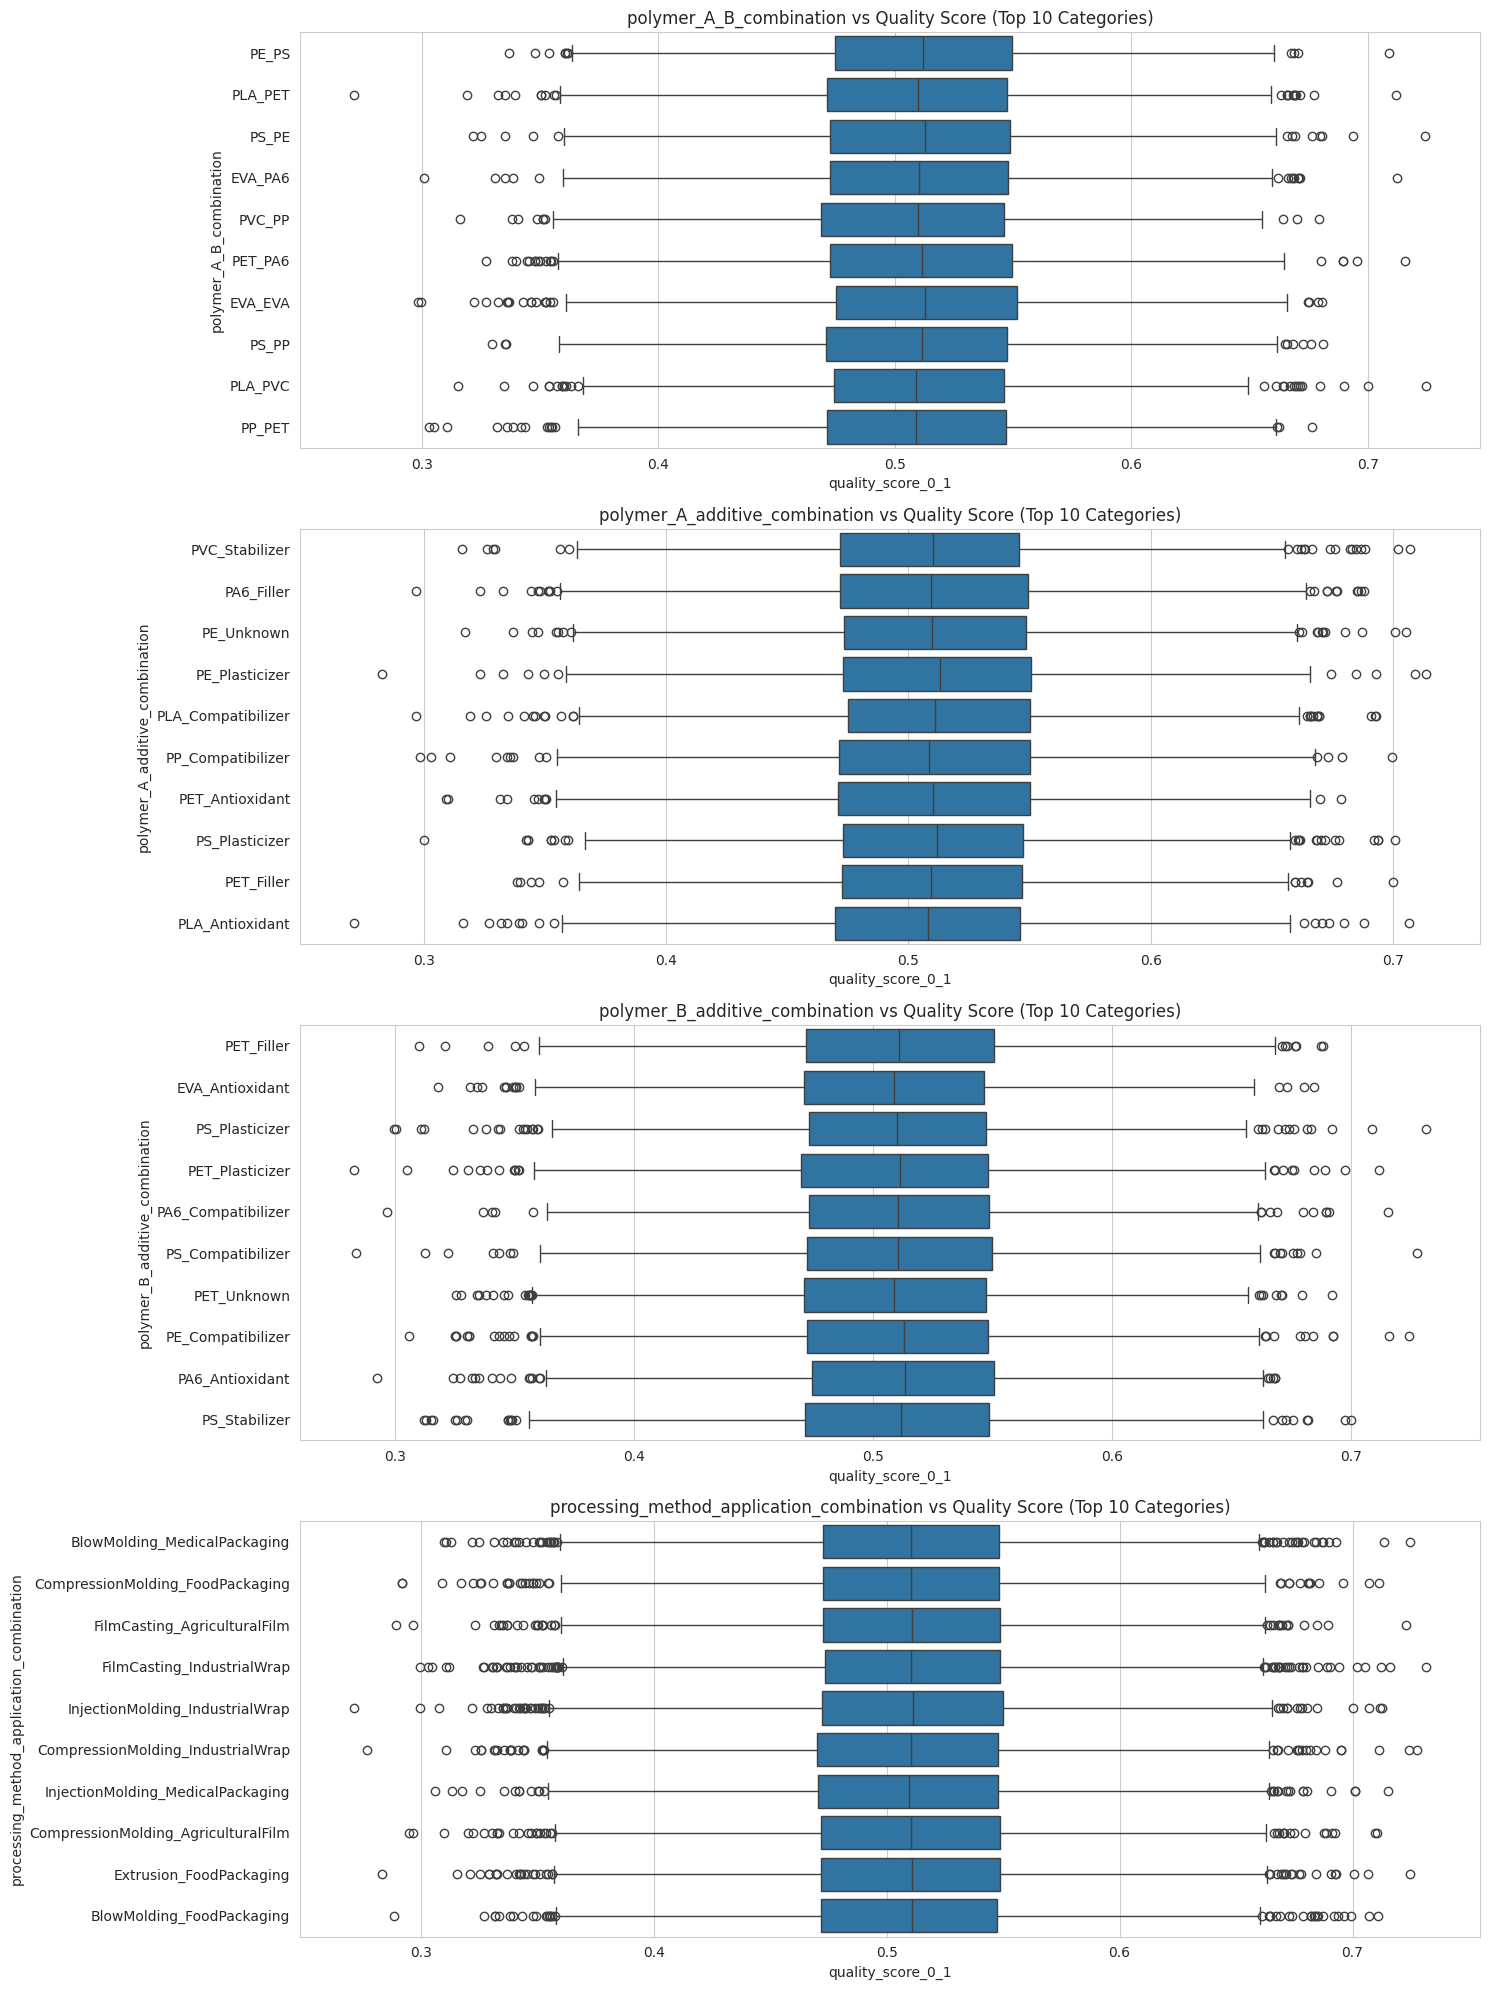

In [17]:
# Select the newly engineered categorical features
engineered_categorical_cols = [
    'polymer_A_B_combination',
    'polymer_A_additive_combination',
    'polymer_B_additive_combination',
    'processing_method_application_combination'
]

# Ensure only existing columns are selected
engineered_categorical_cols = [col for col in engineered_categorical_cols if col in df.columns]

# Visualize the relationship between engineered categorical features and quality_score_0_1
plt.figure(figsize=(15, 20))
for i, col in enumerate(engineered_categorical_cols):
    plt.subplot(4, 1, i + 1)
    # For categorical features with many unique values, display top N for better readability
    top_n = 10
    top_categories = df[col].value_counts().nlargest(top_n).index
    sns.boxplot(data=df[df[col].isin(top_categories)], x='quality_score_0_1', y=col, order=top_categories)
    plt.title(f'{col} vs Quality Score (Top {top_n} Categories)')
plt.tight_layout()
plt.show()

## Select features for modeling

### Subtask:
Based on the evaluation, select the most promising features (original and engineered) for the machine learning models.


**Reasoning**:
Review the previous analysis and create a list of selected features for modeling, including the target variable.



In [18]:
# Review the correlation heatmap for engineered numerical features and the box plots for engineered categorical features
# Also, consider the original features that showed significant relationships with 'quality_score_0_1' in the initial EDA.

# Based on the heatmap and box plots, select features with notable relationships with 'quality_score_0_1'.
# Numerical features from initial EDA with notable correlation/scatter patterns:
# 'blend_ratio_A', 'tensile_strength_MPa', 'modulus_MPa', 'material_cost_usd_kg'

# Engineered numerical features from evaluation with notable correlation with 'quality_score_0_1':
# 'tensile_strength_MPa_x_blend_ratio_A' (high positive)
# 'blend_ratio_A_x_modulus_MPa' (moderate positive)
# 'material_cost_usd_kg_x_blend_ratio_A' (moderate positive)
# 'material_cost_usd_kg_x_tensile_strength_MPa' (moderate positive)
# 'tensile_strength_MPa^2' (moderate positive)
# 'modulus_MPa^2' (moderate negative)
# 'tensile_strength_to_modulus' (moderate positive)
# 'material_cost_to_tensile_strength' (moderate negative)


# Engineered categorical features from evaluation where box plots show variations in quality score across categories:
# 'polymer_A_B_combination'
# 'polymer_A_additive_combination'
# 'polymer_B_additive_combination'
# 'processing_method_application_combination'


# Create a list of selected feature names
selected_features = [
    'blend_ratio_A',
    'tensile_strength_MPa',
    'modulus_MPa',
    'material_cost_usd_kg',
    'tensile_strength_MPa_x_blend_ratio_A',
    'blend_ratio_A_x_modulus_MPa',
    'material_cost_usd_kg_x_blend_ratio_A',
    'material_cost_usd_kg_x_tensile_strength_MPa',
    'tensile_strength_MPa^2',
    'modulus_MPa^2',
    'tensile_strength_to_modulus',
    'material_cost_to_tensile_strength',
    'polymer_A_B_combination',
    'polymer_A_additive_combination',
    'polymer_B_additive_combination',
    'processing_method_application_combination',
    'additive_type', # Include original additive_type as it has missing values filled and is part of combinations
    'polymer_A', # Include original polymers
    'polymer_B',
    'processing_method', # Include original processing method
    'application', # Include original application
    'quality_score_0_1'  # Include the target variable
]

# Ensure all selected features exist in the DataFrame columns
selected_features = [feature for feature in selected_features if feature in df.columns]

# Display the list of selected features
print("Selected Features for Modeling:")
print(selected_features)

Selected Features for Modeling:
['blend_ratio_A', 'tensile_strength_MPa', 'modulus_MPa', 'material_cost_usd_kg', 'tensile_strength_MPa_x_blend_ratio_A', 'blend_ratio_A_x_modulus_MPa', 'material_cost_usd_kg_x_blend_ratio_A', 'material_cost_usd_kg_x_tensile_strength_MPa', 'tensile_strength_MPa^2', 'modulus_MPa^2', 'tensile_strength_to_modulus', 'material_cost_to_tensile_strength', 'polymer_A_B_combination', 'polymer_A_additive_combination', 'polymer_B_additive_combination', 'processing_method_application_combination', 'additive_type', 'polymer_A', 'polymer_B', 'processing_method', 'application', 'quality_score_0_1']


## Data splitting

### Subtask:
Split the dataset with the selected features into training, validation, and testing sets.


**Reasoning**:
Import the necessary function and split the data into training, validation, and testing sets using the selected features.



In [19]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df[selected_features].drop('quality_score_0_1', axis=1)
y = df['quality_score_0_1']

# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (72000, 21)
Shape of y_train: (72000,)
Shape of X_val: (24000, 21)
Shape of y_val: (24000,)
Shape of X_test: (24000, 21)
Shape of y_test: (24000,)


## Model selection

### Subtask:
Choose appropriate machine learning models for building surrogates (XGBoost).


## Model training and evaluation

### Subtask:
Train the selected machine learning models (XGBoost) on the training data and evaluate their performance using appropriate metrics.


**Reasoning**:
Import necessary libraries and identify categorical features for encoding.



In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Identify categorical features in the training data
categorical_cols_train = X_train.select_dtypes(include='object').columns
print("Categorical columns in X_train:", list(categorical_cols_train))

Categorical columns in X_train: ['polymer_A_B_combination', 'polymer_A_additive_combination', 'polymer_B_additive_combination', 'processing_method_application_combination', 'additive_type', 'polymer_A', 'polymer_B', 'processing_method', 'application']


**Reasoning**:
Apply one-hot encoding to the identified categorical features in the training, validation, and test sets, ensuring column alignment. Then, instantiate and train the XGBoost model using the training and validation sets.



In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
# from xgboost.callback import EarlyStopping # Commenting out the import

# Apply one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols_train, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_cols_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols_train, drop_first=True)

# Align columns - this is crucial after one-hot encoding
train_cols = X_train_encoded.columns
X_val_encoded = X_val_encoded.reindex(columns=train_cols, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=train_cols, fill_value=0)

# Instantiate the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model with the validation set
# Removing explicit early stopping parameters due to previous errors
xgb_model.fit(X_train_encoded, y_train,
              eval_set=[(X_val_encoded, y_val)],
              verbose=False) # Set to True to see training progress

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
# Make predictions on the validation and test sets
y_val_pred = xgb_model.predict(X_val_encoded)
y_test_pred = xgb_model.predict(X_test_encoded)

# Evaluate the model performance
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Validation Set Performance:")
print(f"  Mean Squared Error (MSE): {mse_val:.4f}")
print(f"  R-squared (R2): {r2_val:.4f}")

print(f"\nTest Set Performance:")
print(f"  Mean Squared Error (MSE): {mse_test:.4f}")
print(f"  R-squared (R2): {r2_test:.4f}")

Validation Set Performance:
  Mean Squared Error (MSE): 0.0027
  R-squared (R2): 0.1648

Test Set Performance:
  Mean Squared Error (MSE): 0.0027
  R-squared (R2): 0.1730


In [29]:
# Define the surrogate model function
# This function will take the input features and return the predicted quality score
# and material cost (as a second objective for multi-objective optimization)

def surrogate_model(features):
    # Ensure the input features are in the correct format (DataFrame with one-hot encoding)
    # We need to apply the same preprocessing (one-hot encoding and column alignment)
    # to the input features for the surrogate model as was applied to the training data.

    # Create a DataFrame from the input features
    features_df = pd.DataFrame([features], columns=X.columns)

    # Apply one-hot encoding to the categorical features
    features_encoded = pd.get_dummies(features_df, columns=categorical_cols_train, drop_first=True)

    # Align columns with the training data - fill missing columns with 0
    features_encoded = features_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

    # Predict the quality score using the trained XGBoost model
    predicted_quality_score = xgb_model.predict(features_encoded)[0]

    # For multi-objective optimization, let's also return the material cost
    # Assuming 'material_cost_usd_kg' is one of the input features
    material_cost = features_df['material_cost_usd_kg'].iloc[0]

    return predicted_quality_score, material_cost

# Example usage of the surrogate model
# Let's take the first row of the original data as an example input
example_input = X.iloc[0].values
predicted_quality, actual_cost = surrogate_model(example_input)

print(f"Example Input Features (first row of X): {example_input}")
print(f"Predicted Quality Score: {predicted_quality:.4f}")
print(f"Actual Material Cost: {actual_cost:.4f}")

Example Input Features (first row of X): [np.float64(0.7118752593124383) np.float64(53.77461214286668)
 np.float64(1249.0984375493442) np.float64(1.669551736366521)
 np.float64(38.28081596362901) np.float64(889.202274137201)
 np.float64(1.188512575261449) np.float64(89.77949707555928)
 np.float64(2891.7089111157447) np.float64(1560246.9066882129)
 np.float64(0.043050740058826885) np.float64(0.031047211124458917)
 'PA6_PVC' 'PA6_Plasticizer' 'PVC_Plasticizer'
 'FilmCasting_AgriculturalFilm' 'Plasticizer' 'PA6' 'PVC' 'FilmCasting'
 'AgriculturalFilm']
Predicted Quality Score: 0.5187
Actual Material Cost: 1.6696


In [30]:
# We need to install a multi-objective optimization library like pymoo
%pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.3 MB/s eta 0:00:00


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      7 |             - |             -
     2 |      110 |      7 |  0.000000E+00 |             f
     3 |      120 |      7 |  0.0165458776 |             f
     4 |      130 |      8 |  0.0176929450 |             f
     5 |      140 |      8 |  0.000000E+00 |             f
     6 |      150 |      8 |  0.000000E+00 |             f
     7 |      160 |      8 |  0.0098778546 |             f
     8 |      170 |      7 |  0.0143587685 |             f
     9 |      180 |      8 |  0.0220788506 |             f
    10 |      190 |      9 |  0.0056123589 |             f
    11 |      200 |     10 |  0.000000E+00 |             f
    12 |      210 |     11 |  0.0021720028 |             f
    13 |      220 |     11 |  0.0021720028 |             f
    14 |      230 |      8 |  0.0156601454 |             f
    15 |      240 |      4 |  5.5812979050 |         nadir
    16 |      250 |      4 |  0.000000E+00 |            

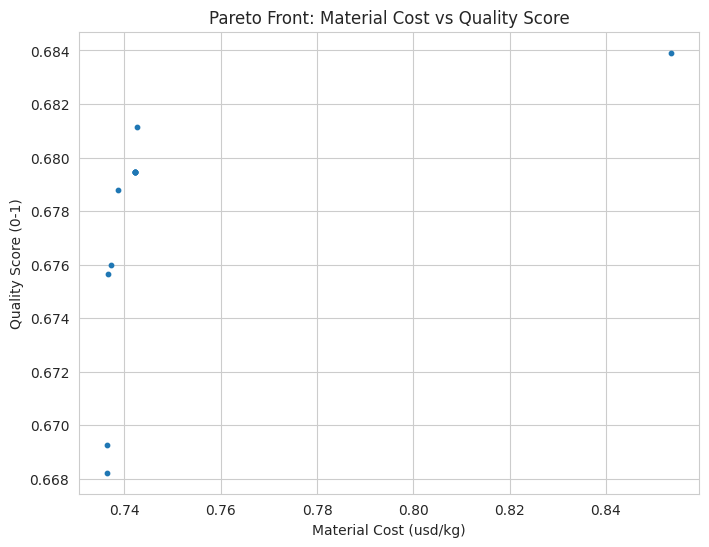

In [33]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import FloatRandomSampling
# from pymoo.operators.mutation.rnd import RndMutation # Removed RndMutation import
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.optimize import minimize
# from pymoo.util.display import MultiObjectiveDisplay # Removed MultiObjectiveDisplay import

# Define the selected features used in the surrogate model
# These will be our design variables for the optimization
design_variables = [col for col in selected_features if col != 'quality_score_0_1']

# Identify the types of design variables (numerical or categorical)
numerical_design_vars = X.select_dtypes(include=np.number).columns.intersection(design_variables).tolist()
categorical_design_vars = X.select_dtypes(include='object').columns.intersection(design_variables).tolist()

# Get the ranges for numerical design variables from the original data
numerical_bounds = {}
for col in numerical_design_vars:
    numerical_bounds[col] = (df[col].min(), df[col].max())

# Get the unique values for categorical design variables from the original data
categorical_options = {}
for col in categorical_design_vars:
    categorical_options[col] = df[col].unique().tolist()


# Define the multi-objective optimization problem
class PolymerBlendOptimization(Problem):

    def __init__(self, surrogate_model, numerical_design_vars, numerical_bounds, categorical_design_vars, categorical_options):
        super().__init__(n_var=len(design_variables),
                         n_obj=2,  # Two objectives: maximize quality, minimize cost
                         n_constr=0, # No constraints for now
                         xl=np.array([0] * len(design_variables)), # Lower bounds (will be set properly below)
                         xu=np.array([1] * len(design_variables))) # Upper bounds (will be set properly below)

        self.surrogate_model = surrogate_model
        self.numerical_design_vars = numerical_design_vars
        self.numerical_bounds = numerical_bounds
        self.categorical_design_vars = categorical_design_vars
        self.categorical_options = categorical_options

        # Set the lower and upper bounds based on variable types
        xl = []
        xu = []
        for var in design_variables:
            if var in self.numerical_design_vars:
                xl.append(self.numerical_bounds[var][0])
                xu.append(self.numerical_bounds[var][1])
            elif var in self.categorical_design_vars:
                # For categorical variables, we'll represent them as integers
                # and map back to categories in the _evaluate method
                xl.append(0)
                xu.append(len(self.categorical_options[var]) - 1)

        self.xl = np.array(xl)
        self.xu = np.array(xu)


    def _evaluate(self, x, out, *args, **kwargs):
        # This method evaluates the objectives for a given set of design variables (x)
        predicted_qualities = []
        material_costs = []

        for i in range(x.shape[0]):
            features = {}
            for j, var in enumerate(design_variables):
                if var in self.numerical_design_vars:
                    features[var] = x[i, j]
                elif var in self.categorical_design_vars:
                    # Map integer representation back to the category string
                    category_index = int(round(x[i, j]))
                    features[var] = self.categorical_options[var][category_index]

            # Convert the features dictionary to a list of values in the correct order
            features_list = [features[var] for var in design_variables]


            # Use the surrogate model to predict the quality score and get the material cost
            predicted_quality, material_cost = self.surrogate_model(features_list)

            predicted_qualities.append(predicted_quality)
            material_costs.append(material_cost)

        # We want to maximize quality and minimize cost
        # NSGA-II minimizes objectives, so we negate the quality score
        f1 = -np.array(predicted_qualities)  # Minimize negative quality (maximize quality)
        f2 = np.array(material_costs)       # Minimize material cost

        out["F"] = np.column_stack([f1, f2])

# Instantiate the optimization problem
problem = PolymerBlendOptimization(surrogate_model, numerical_design_vars, numerical_bounds, categorical_design_vars, categorical_options)

# Configure the NSGA-II algorithm
algorithm = NSGA2(
    pop_size=100,  # Population size
    n_offsprings=10, # Number of offsprings per generation
    sampling=FloatRandomSampling(), # Random sampling for initial population
    crossover=SBX(prob=0.9, eta=15), # Simulated Binary Crossover
    mutation=PM(prob=1.0/problem.n_var, eta=20), # Polynomial Mutation
    eliminate_duplicates=True
)

# Run the optimization
# Set a reasonable number of generations for the optimization
n_generations = 100

res = minimize(problem,
               algorithm,
               ('n_gen', n_generations), # Stop after a certain number of generations
               verbose=True, # Set to True to see optimization progress
               seed=42)

# Display the results
print("\nOptimization Results:")
print("Pareto Front (Objectives - Negated Quality, Cost):")
print(res.F)

print("\nCorresponding Design Variables (Encoded):")
print(res.X)

# We can also visualize the Pareto front
if res.F is not None:
    plt.figure(figsize=(8, 6))
    plt.scatter(res.F[:, 1], -res.F[:, 0], s=10) # Plot Cost vs Quality (negated quality)
    plt.title('Pareto Front: Material Cost vs Quality Score')
    plt.xlabel('Material Cost (usd/kg)')
    plt.ylabel('Quality Score (0-1)')
    plt.grid(True)
    plt.show()
else:
    print("No solutions found in the optimization.")

In [34]:
# Extract the Pareto front objectives and design variables
pareto_front_objectives = res.F
pareto_front_variables_encoded = res.X

print("Pareto Front Solutions and Corresponding Design Variables:")

# Iterate through each solution on the Pareto front
for i in range(pareto_front_objectives.shape[0]):
    negated_quality = pareto_front_objectives[i, 0]
    material_cost = pareto_front_objectives[i, 1]
    design_var_values_encoded = pareto_front_variables_encoded[i, :]

    # Convert encoded design variable values back to original format
    design_var_values = {}
    for j, var in enumerate(design_variables):
        if var in numerical_design_vars:
            design_var_values[var] = design_var_values_encoded[j]
        elif var in categorical_design_vars:
            # Map integer representation back to the category string
            category_index = int(round(design_var_values_encoded[j]))
            # Ensure the index is within the valid range
            if 0 <= category_index < len(categorical_options[var]):
                 design_var_values[var] = categorical_options[var][category_index]
            else:
                 design_var_values[var] = f"Invalid Index ({category_index})"


    print(f"\nSolution {i+1}:")
    print(f"  Quality Score: {-negated_quality:.4f}") # Negate to get actual quality
    print(f"  Material Cost: {material_cost:.4f}")
    print("  Design Variables:")
    for var, value in design_var_values.items():
        if isinstance(value, float):
            print(f"    {var}: {value:.4f}")
        else:
            print(f"    {var}: {value}")

Pareto Front Solutions and Corresponding Design Variables:

Solution 1:
  Quality Score: 0.6794
  Material Cost: 0.7422
  Design Variables:
    blend_ratio_A: 0.5624
    tensile_strength_MPa: 85.3635
    modulus_MPa: 1871.3376
    material_cost_usd_kg: 0.7422
    tensile_strength_MPa_x_blend_ratio_A: 65.8322
    blend_ratio_A_x_modulus_MPa: 873.4049
    material_cost_usd_kg_x_blend_ratio_A: 0.4385
    material_cost_usd_kg_x_tensile_strength_MPa: 160.4839
    tensile_strength_MPa^2: 5372.4448
    modulus_MPa^2: 1936304.3831
    tensile_strength_to_modulus: 0.0804
    material_cost_to_tensile_strength: 0.0713
    polymer_A_B_combination: PVC_EVA
    polymer_A_additive_combination: PE_Stabilizer
    polymer_B_additive_combination: PA6_Antioxidant
    processing_method_application_combination: InjectionMolding_FoodPackaging
    additive_type: Compatibilizer
    polymer_A: EVA
    polymer_B: PA6
    processing_method: CompressionMolding
    application: MedicalPackaging

Solution 2:
  Quali